<a href="https://colab.research.google.com/github/Maryam-Zubair/Data-Science/blob/main/all_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the diabetes dataset using sklearn.datasets.load_diabetes.
- Scale the dataset (you can be creative and make pipelines)
- Apply LinearRegression,
- Apply Ridge and do grid search
- Apply Lasso and do grid search
- Visualize the coefficients.


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score

In [ ]:
diab = load_diabetes()

In [ ]:
diab.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
X = diab.data
y = diab.target

In [ ]:
X.shape

(442, 10)

In [ ]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [ ]:
lr.coef_, lr.intercept_

(array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
        -792.17563855,  476.73902101,  101.04326794,  177.06323767,
         751.27369956,   67.62669218]),
 152.13348416289597)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
lr = Pipeline(steps=[('scaler', StandardScaler()),\
('linr', LinearRegression())])

In [ ]:
lasso = Pipeline(steps=[('scaler', StandardScaler()),\
('lasso', Lasso())])

In [ ]:
ridge = Pipeline(steps=[('scaler', StandardScaler()),\
('ridge', Ridge())])

In [ ]:
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.4941552781174652
0.5751999811777543


In [ ]:
X_train_s = pipeline.fit_transform(X_train)
X_test_s = pipeline.transform(X_test)

X_train_s.shape, X_test_s.shape

((331, 10), (111, 10))

In [ ]:
type(X)

numpy.ndarray

In [ ]:
import numpy as np
params1 = {'ridge__alpha':np.logspace(-3, 3, 10)}

In [ ]:
grid_ridge = GridSearchCV(ridge, param_grid = params1, cv=10)

In [ ]:
grid_ridge.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])})

In [ ]:
print(grid_ridge.score(X_train, y_train))
print(grid_ridge.score(X_test, y_test))

0.4895021655699404
0.5600852611927409


In [ ]:
best_ridge = grid_ridge.best_estimator_

In [ ]:
best_ridge

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=46.41588833612773))])

In [ ]:
best_ridge.named_steps['ridge'].coef_

array([  3.20058953, -10.58562906,  22.09677845,  12.98473282,
        -2.48241825,  -3.85878761,  -9.56793054,   6.13134616,
        18.56862891,   3.72300319])

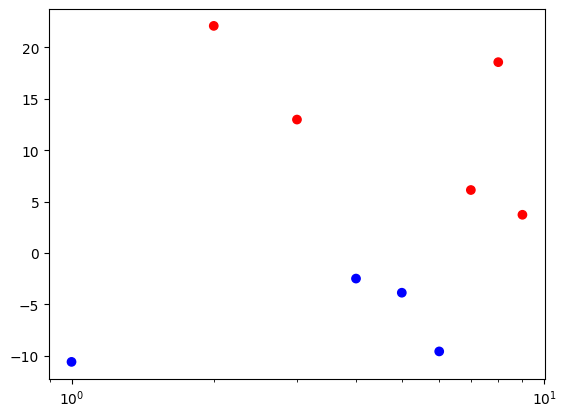

In [ ]:
import matplotlib.pyplot as plt
coef = best_ridge.named_steps['ridge'].coef_
plt.xscale('log')
plt.scatter(range(0, X_train.shape[1]), coef, c=np.sign(coef), cmap='bwr')

In [ ]:
params1 = {'lasso__alpha':np.logspace(-3, 3, 10)}

In [ ]:
grid_lasso = GridSearchCV(lasso, param_grid = params1, cv=10)

In [ ]:
grid_lasso.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])})

In [ ]:
print(grid_lasso.score(X_train, y_train))
print(grid_lasso.score(X_test, y_test))

0.49301269463233155
0.570383836639025
